# Week 4 - IT Class Revision Solutions

## Question 1

Determine the location, character and value of the stationary points of $f(x,y) = x^4 + y^4 + 2x^2y^2 + 2x^2 + 2y^2 + 1$. 


## Answer:

First, we calculate the first set of partial derivatives:
$$f_x = \frac{\partial f}{\partial x} = 4 x ^ {3} + 4xy^{2} + 4x = 4x (x^{2} + y^{2} + 1)$$
$$f_y = \frac{\partial f}{\partial y} = 4 y ^ {3} + 4x^{2}y + 4y = 4y (x^{2} + y^{2} + 1)$$
and set the terms to zero
$$4x (x^{2} + y^{2} + 1) = 0$$
$$4y (x^{2} + y^{2} + 1) = 0$$

Since $x^{2} + y^{2} + 1 \geq 1$, the only solution to the two equations are $x=0$ and $y=0$. So, the stationary point of the function is (0,0).

Next, we calculate the second-order derivatives:
$$f_{xx} = \frac{\partial ^2f}{\partial x^2} = 12x^2 + 4y^2 + 4$$
$$f_{xy} = \frac{\partial ^2f}{\partial x \partial y} = 8xy$$
$$f_{yy} = \frac{\partial ^2f}{\partial y^2} = 12y^2 + 4x^2 +4$$

So, the Hessian Matrix of the function is
\begin{equation}
\begin{pmatrix}
  f_{xx} & f_{xy}              \\
  f_{xy} & f_{yy}  \\
\end{pmatrix}
=
\begin{pmatrix}
  12x^2 + 4y^2 + 4 & 8xy              \\
  8xy              & 12y^2 + 4x^2 +4  \\
\end{pmatrix}
\end{equation}

We evaluate the Hessian at (0,0):
\begin{equation}
\begin{pmatrix}
  4 & 0  \\
  0 & 4  \\
\end{pmatrix}
\end{equation}

The determinant $D$ of this matrix is $16>0$, and $f_{xx} = 4 > 0$. Therefore, the local minimum is (0,0), where $f(0,0)=1$.

We plot this function to visualise the stationary point we just calculated.

<IPython.core.display.Javascript object>


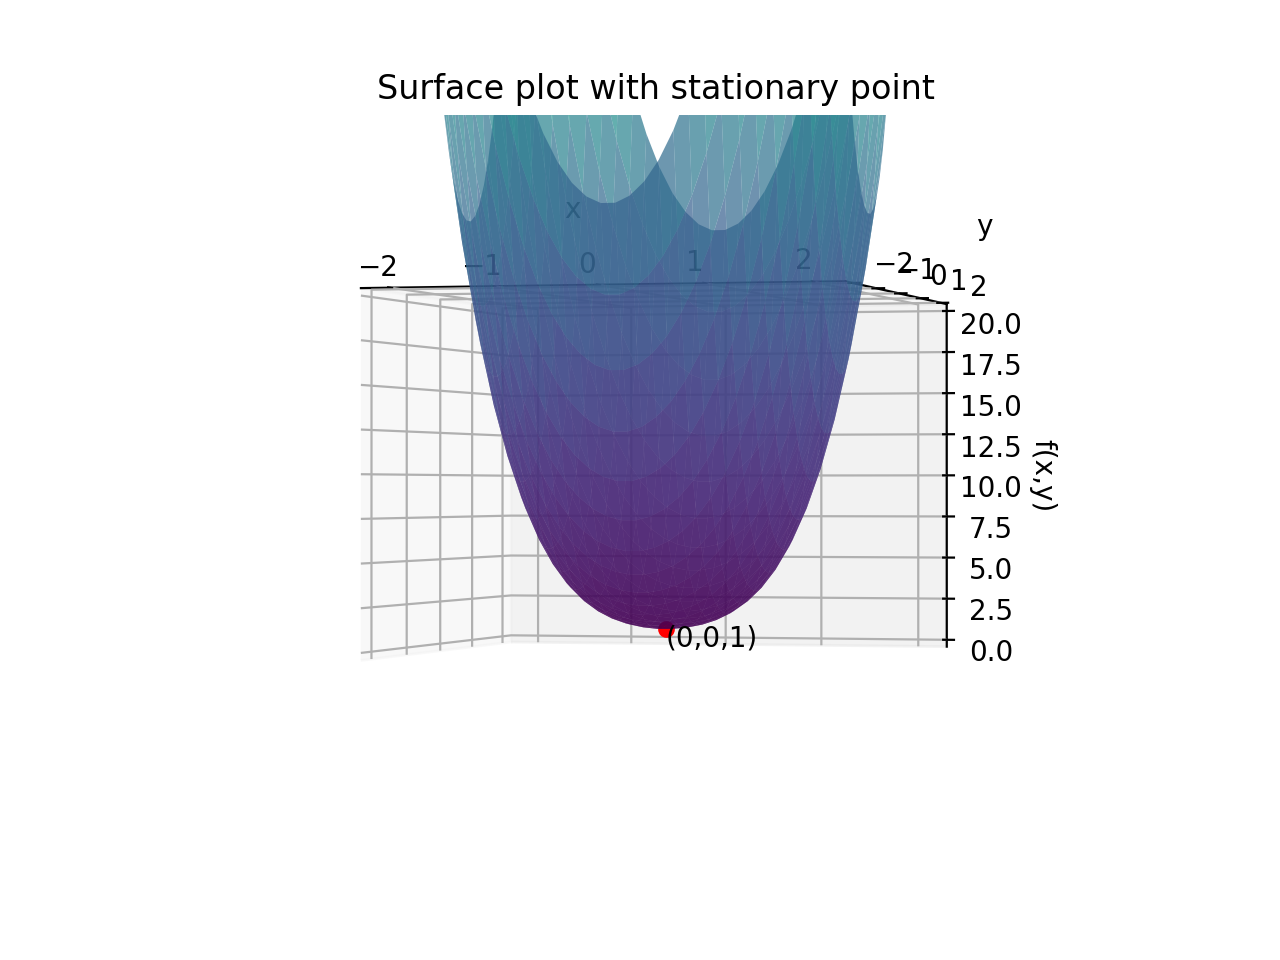

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define f(x,y)
f = lambda x,y : x**4 + y**4 + 2 * x**2 * y**2 + 2 * x**2 + 2 * y**2 + 1

# Generate x,y mesh and compute z=f(x,y)
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T # transpose
z = f(x , y)

#Plot, set figure as 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlim([0,20])

#add the surface
ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none',alpha=0.7)
#Put stationary point and mark its coordinates
ax.plot(0,0,1,'r.',markersize=10)
ax.text(0,0,0,'(0,0,1)',color='black')
ax.set_title('Surface plot with stationary point')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.show()

## Question 2 

The magnetic induction $\underline{\textbf{B}}$ resulting from a current with strength $I$ through an infinitely long wire along the $z$-axis is given by 

$$\underline{\textbf{B}} = \frac{\mu_o I}{2\pi} \bigg(-\frac{y}{x^2+y^2}, \frac{x}{x^2+y^2}, 0\bigg) $$

where $\mu_o$ is the permeability of the vacuum. Determine the magnetic field lines. 

## Answer: 

The field lines (x,y,z) should satisfy the following equations:
$$\frac{dx}{dt} = -\frac{\mu_0 I}{2\pi} \frac{y}{x^2+y^2}   ~~~~~(1)$$

$$\frac{dy}{dt} = \frac{\mu_0 I}{2\pi} \frac{x}{x^2+y^2}   ~~~~~(2)$$

$$\frac{dz}{dt} = 0   ~~~~~(3)$$
where $t$ is a dummy variable.

Dividing (2) by (1), we obtain:
$$\frac{dy}{dx} = -\frac{x}{y} $$

This can be solved using the separation of variables for first-order ODEs:

$$ydy=-xdx$$

Integrating both sides, we obtain:
$$\int y dy = \int -x dx $$

$$\frac{1}{2}y^2 = -\frac{1}{2} x^2 + C_0$$

$$y^2 + x^2 = C_1 ~~~~~(4)$$
where $C_1 = 2C_0$ and is a constant of integration.

For (3), we integrate both sides to obtain:
$$z = C_2 ~~~~~(5)$$

where $C_2$ is a constant of integration.

Hence, (4) and (5) are the magnetic field lines which corresponds to a set of cocentric circles at varying heights along z-axis.

Now we plot the vector field as well as the field lines using Python for demonstration. We can set the coefficient $\mu_0 I / 2 \pi = 1$.

<IPython.core.display.Javascript object>


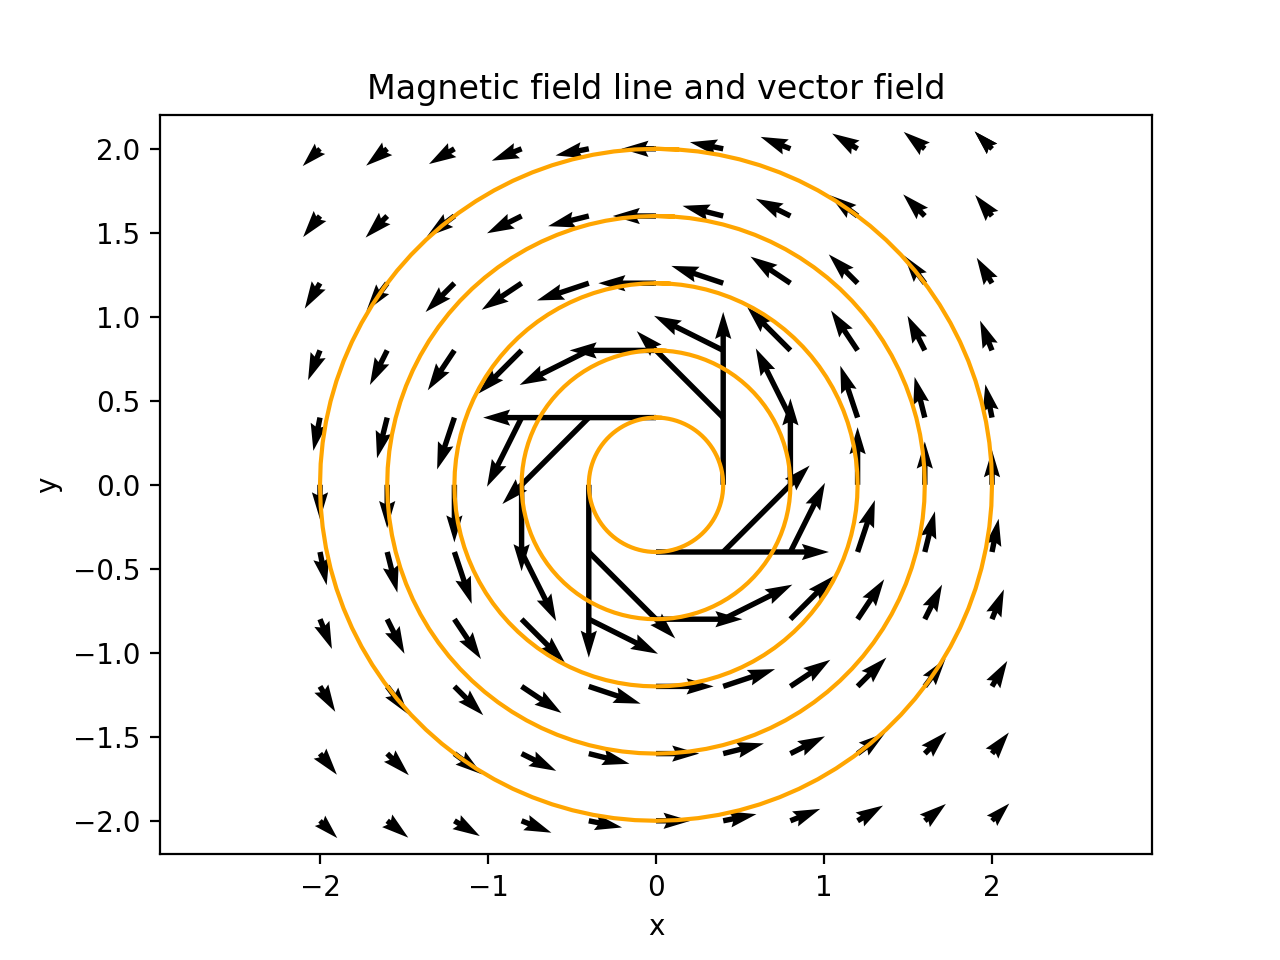

In [2]:
pi = 3.141592654

# Magnetic vector field
Bx = lambda x,y,z : -y / (x**2 + y**2)
By = lambda x,y,z : x / (x**2 + y**2)
Bz = lambda x,y,z : 0

# Generate some x y points for demonstration.
x = np.outer(np.linspace(-2,2,11), np.ones(11))
#In the defination of magnetic vector field, (x,y) = (0,0) will be unsolvable.
#So remove this point by setting it to another value
x[5,5] = 2
y = x.copy().T
B_x = Bx(x,y,0)        # Calculate magnetic field at all generated points.
B_y = By(x,y,0)

fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('equal')
ax.set_title('Magnetic field line and vector field')
ax.quiver(x,y,B_x,B_y)        # Plot magnetic vector field. 
c1 = np.arange(0,2.4,0.4)     # Choose of constant C1
theta = np.arange(0,2.02*pi,0.02*pi)  #Choose point along circles
for i in c1:        # Some points on the field line x-y plane
    px = i*np.sin(theta)    #Here, we evaluate x^2 + y^2 = C1 through a parameter function, x = a sin (theta), y= a cos (theta) 
    py = i*np.cos(theta)
    ax.plot(px,py,'orange')
plt.show()

In three dimensions, the figure can be drawn as:

<IPython.core.display.Javascript object>


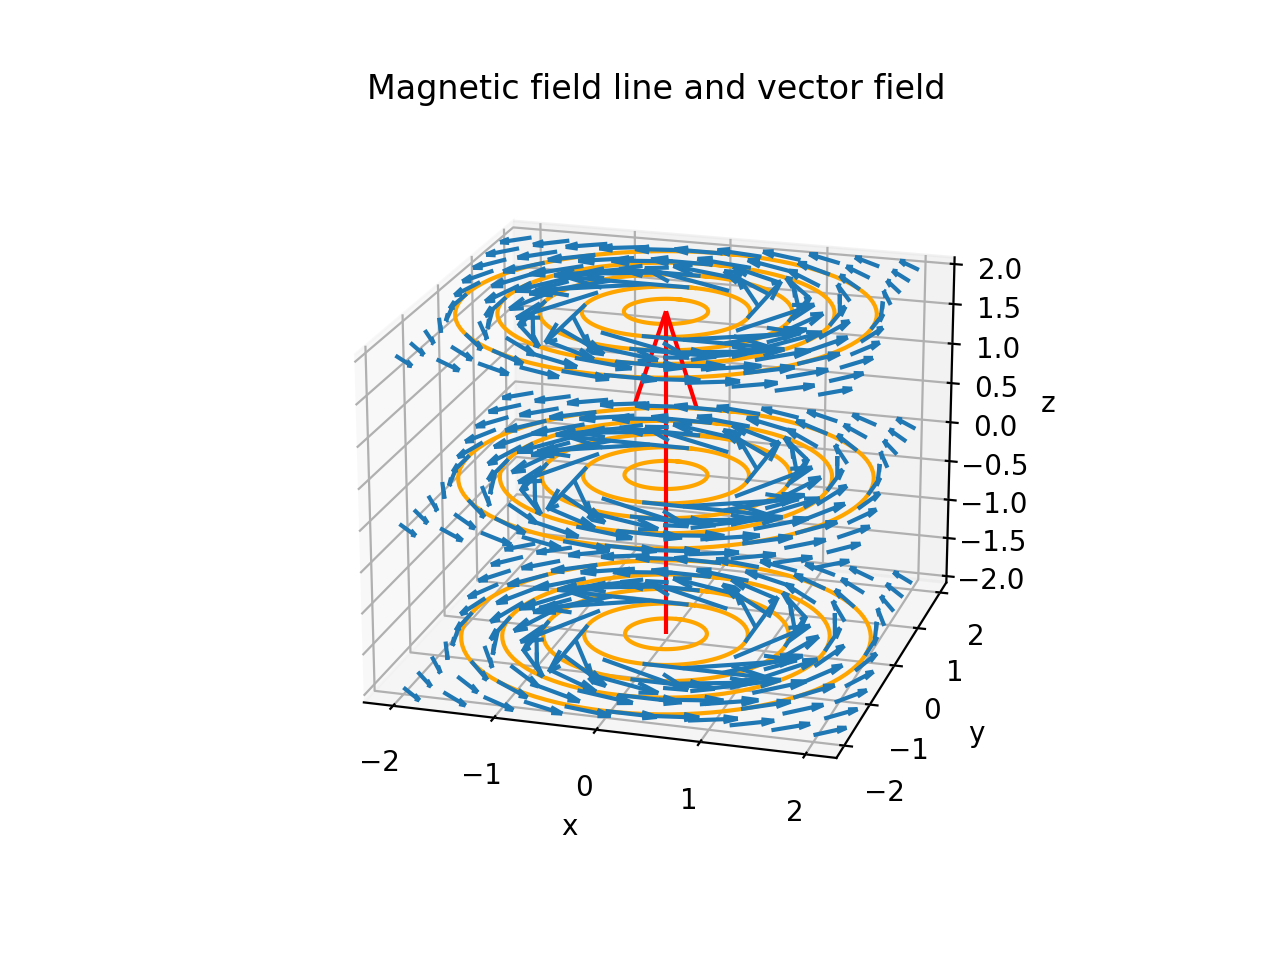

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Magnetic field line and vector field')
x, y, z = np.meshgrid(np.arange(-2,2.4,0.4),
                      np.arange(-2,2.4,0.4),
                      np.arange(-2,4,2))       # Generate x,y,z mesh to calculate corresponding B
B_x=Bx(x,y,z)
B_y=By(x,y,z)
B_z=Bz(x,y,z)
B_x[4:7,4:7,:]=0         # We won't plot quivers too close to the wire since they are too crowded
B_y[4:7,4:7,:]=0
ax.quiver(x,y,z,B_x,B_y,B_z)
c1 = np.arange(0,2.4,0.4)
c2 = np.arange(-2,4,2)   # Choose constant C2
theta = np.arange(0,2.02*pi,0.02*pi)
for i in c2:
    for j in c1:
        px = j*np.sin(theta)
        py = j*np.cos(theta)
        pz = i*np.ones(px.shape)
        ax.plot(px,py,pz,'orange')
ax.quiver(0,0,-2,0,0,4, color='red')
plt.show()

The red arrow represents the current $\underline{\textbf{I}}$, blue arrows denote the magnetic field vector and the orange lines are the magnetic field lines.

## Question 3

Find vectors normal to the two scalar fields $\phi_1 = y - x^2$ and $\phi_2 = x + y - 2$. Hence, find the angle between the curves $y = x^2$ and $y = 2 - x$ at their point of intersection in the first quadrant.

## Answer: 

The vectors normal to the scalar field can be found by finding the gradient of the two scalar fields:

$$\nabla \phi_1 = \frac{\partial \phi_1}{\partial x} \underline{\textbf{i}} + \frac{\partial \phi_1}{\partial y} \underline{\textbf{j}} = -2x \underline{\textbf{i}} + \underline{\textbf{j}}$$

$$\nabla \phi_2 = \frac{\partial \phi_2}{\partial x} \underline{\textbf{i}} + \frac{\partial \phi_2}{\partial y} \underline{\textbf{j}} = \underline{\textbf{i}} + \underline{\textbf{j}} $$

where $i$ and $j$ are unit vectors along the $x$ axis and $y$ axis respectively.

The intersection point of the given two curves can be solved by combining the equations $y = x^2$ and $y = 2 - x$
to obtain:

$$ x^2 = 2 - x ~~~\rightarrow~~~ x^2+x-2=0 ~~~\rightarrow~~~ (x-1)(x+2)=0$$

Therefore, the intersection points are  given by $(1,1)$ and $(-2, 4)$. The only intersection point in the first quadrant is (1,1), so we do not consider (-2, 4).

Inserting (1,1) into the gradient of the scalar fields, we can get the normal vectors for these two fields (as well as the normal vectors of these curves at the intersection point):

$$\nabla \phi_1(1,1) = -2 \underline{\textbf{i}} + \underline{\textbf{j}} , ~~~~~and~~~~~ \nabla \phi_2(1,1) = \underline{\textbf{i}} + \underline{\textbf{j}}$$

The angle between these two gradient vectors can be obtained using the dot/scalar product:

$$\theta = \cos^{-1} \frac{(\underline{\textbf{a}} \cdot \underline{\textbf{b}})}{|\underline{\textbf{a}}||\underline{\textbf{b}}|} = \cos^{-1} (\frac {-1}{\sqrt{10}}) = 108^\circ$$

However, we need to solve for the angle between the two curves, which requires knowledge of the tangent directions.

We can use simple geometry to solve this. Assume four angles $\angle A, \angle B, \angle C$ and $\angle D$ as shown in the figure below. We already know $\angle A =108 ^\circ$. 

Since the tangent line is perpendicular to the normal vector, $\angle C = \angle A - 90 ^\circ = 18 ^\circ$. Due to the same perpendicular relationship, $\angle D = 90^\circ - \angle C = 72^\circ$. 

Because the curve is undirectional, the supplementary angle of D, which is $108^\circ$ is also the angle between the desired curves. So the answer for this problem is $72^\circ$ or $108^\circ$.

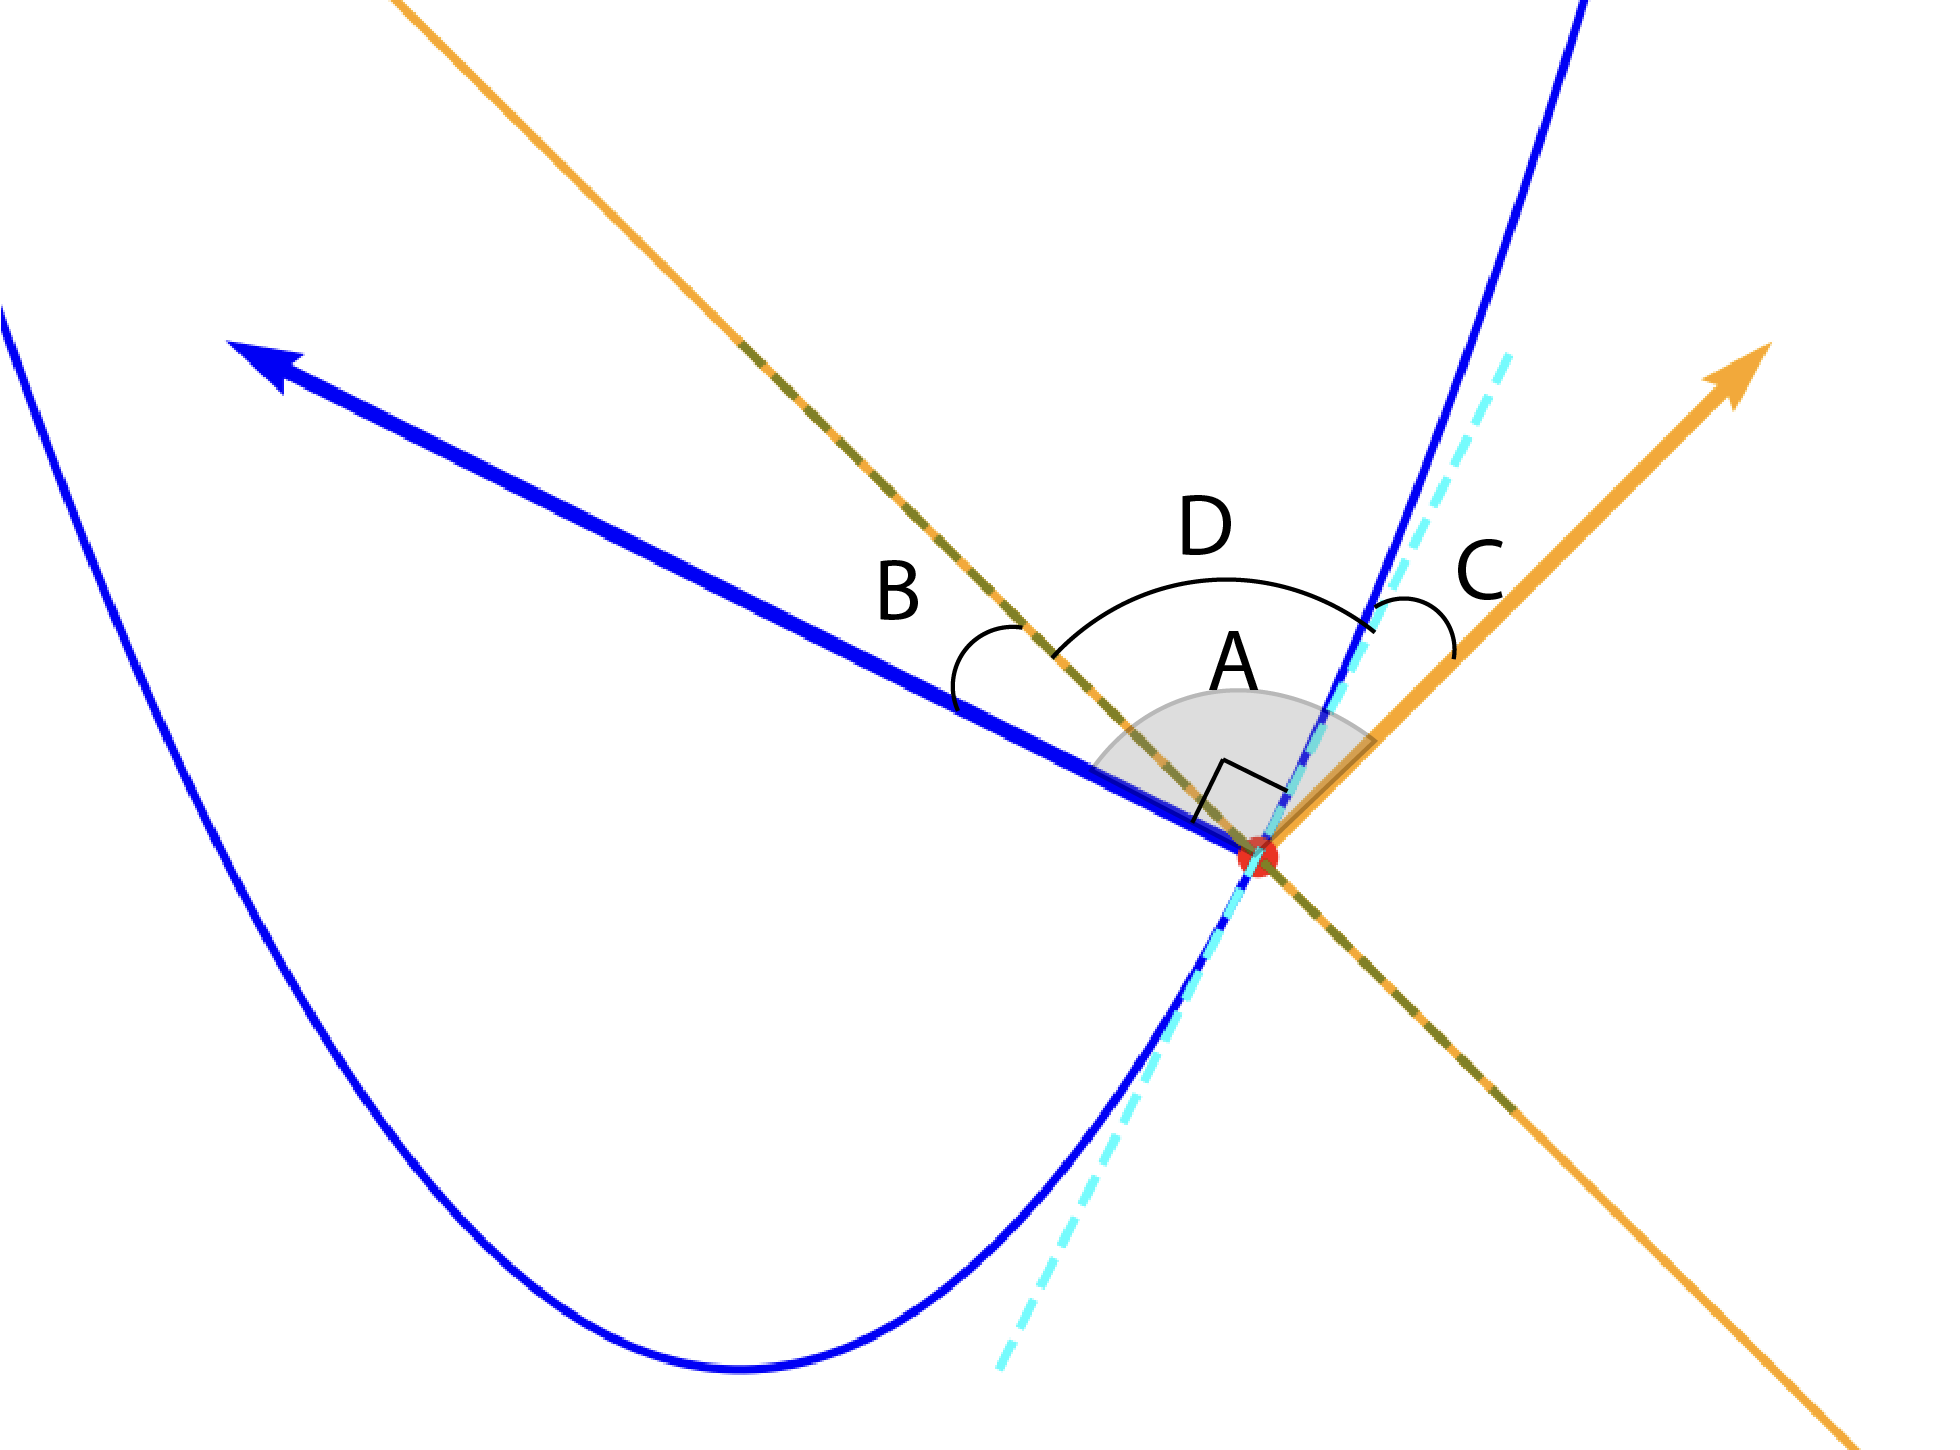

We can also plot the scalar field as well as these vectors to visualize the problem using Python.

<IPython.core.display.Javascript object>


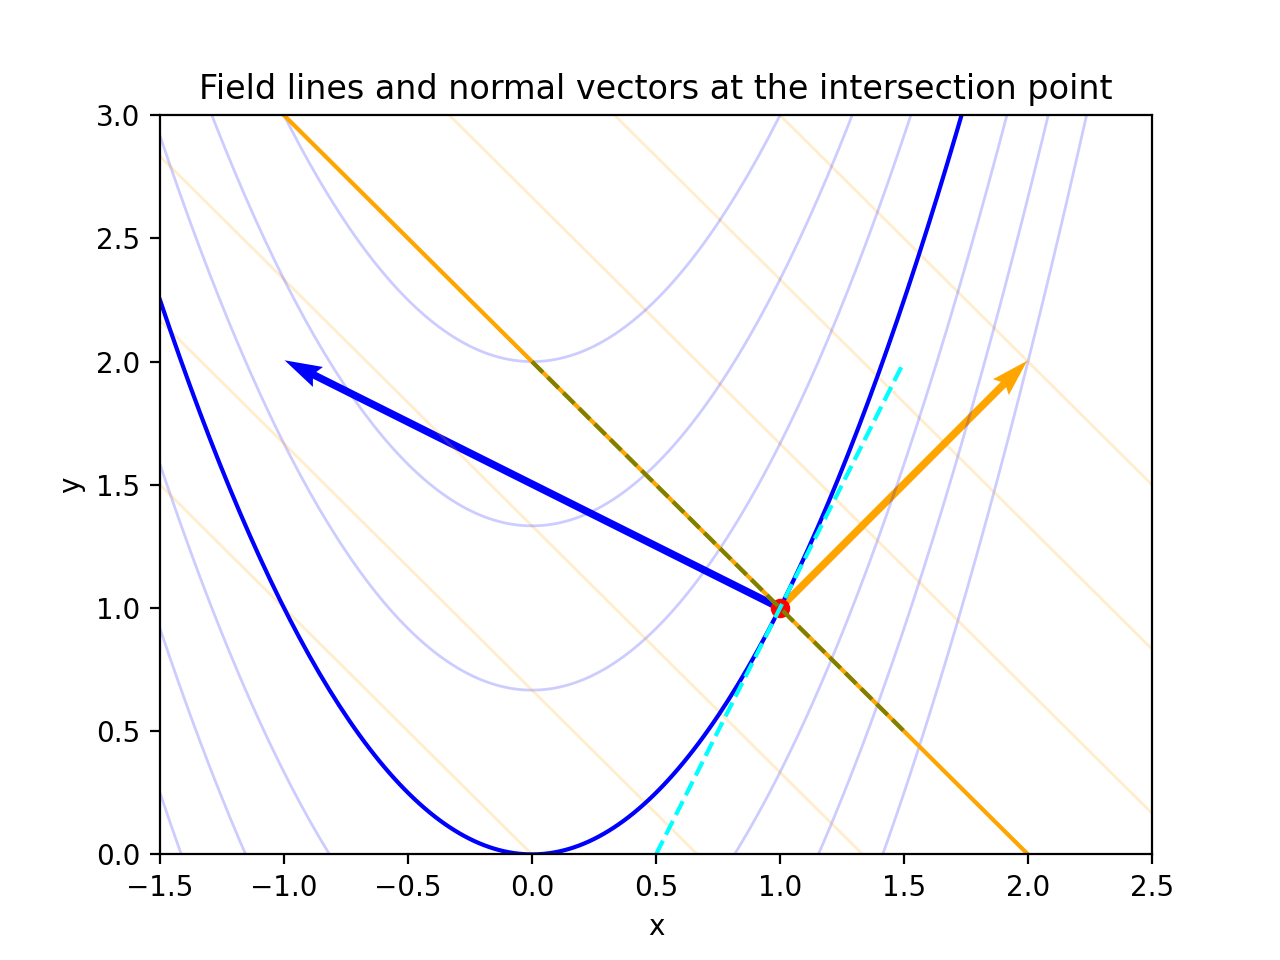

In [4]:
# Define two scalar field
y1 = lambda x,phi : x**2 + phi
y2 = lambda x,phi : -x - phi +2

# Set plot parameters
fig = plt.figure()
ax = plt.axes()
ax.set_xlim([-1.5,2.5])
ax.set_ylim([0,3])

# Plot two scalar field, the blue one is phi1 = x^2, and the orange one is phi2 = -x + 2
x=np.linspace(-1.5,2.5,200)
for phi in np.linspace(-2,2,7):
    y = y1(x , phi)
    ax.plot(x,y,'blue',linewidth=1,alpha=0.2)
    y = y2(x , phi)
    ax.plot(x,y,'orange',linewidth=1,alpha=0.2)
y = y1(x , 0)
ax.plot(x,y,'blue')
y = y2(x , 0)
ax.plot(x,y,'orange')
ax.plot(1,1,'o',color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Field lines and normal vectors at the intersection point')
ax.plot([0,1.5],[2,0.5],'--',color='olive')
ax.plot([0.5,1.5],[0,2],'--',color='cyan')
ax.quiver(1,1,-2,1,scale_units='xy', scale=1, color='b')
ax.quiver(1,1,1,1,scale_units='xy', scale=1, color='orange')
plt.show()





